In [1]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv("AAPL.csv")

In [3]:
df.shape

(1258, 15)

In [4]:
df.isnull().sum()

Unnamed: 0     0
symbol         0
date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [5]:
# Example: Check for negative values
has_negative_values = (df.select_dtypes(include=[np.number]) < 0).any().any()
if has_negative_values:
    print("Negative values found in the DataFrame.")
else:
    print("No negative values found in the DataFrame.")

No negative values found in the DataFrame.


In [6]:
df.shape

(1258, 15)

In [7]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [8]:
#converting the dataype of 'Date' col to 'datetime'
df['date'] = pd.to_datetime(df['date'])

In [9]:
#making the 'Date' col as index
df.set_index('date', inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-05-27 00:00:00+00:00 to 2020-05-22 00:00:00+00:00
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(1)
memory usage: 147.4+ KB


In [11]:
#sort the indexes
df.sort_index(inplace = True)

In [12]:
# Keep only the 'close' column for univariate modeling
df = df[['close']]

In [13]:
# Normalize only the 'close' column
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(df[['close']])
apple_scaled_df = pd.DataFrame(scaled_values, columns=['close'], index=df.index)

In [14]:
scaled_values

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [15]:
#converting the array into dataframe
apple_scaled_df = pd.DataFrame(scaled_values, columns = df.columns, index = df.index)

In [16]:
apple_scaled_df.head()

,close
date,
2015-05-27 00:00:00+00:00,0.176074
2015-05-28 00:00:00+00:00,0.174956
2015-05-29 00:00:00+00:00,0.168623
2015-06-01 00:00:00+00:00,0.169699
2015-06-02 00:00:00+00:00,0.167272


In [17]:
apple_scaled_df.shape

(1258, 1)

In [18]:
window_size = 60

def create_sequence(data, window_size):
    X = []
    y = []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

X, y = create_sequence(apple_scaled_df, window_size)

In [19]:
X.shape, y.shape

((1198, 60, 1), (1198, 1))

In [20]:
#train-test-split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((958, 60, 1), (958, 1), (240, 60, 1), (240, 1))

In [21]:
X_train.shape[1], X_train.shape[2], y_train.shape[1]

(60, 1, 1)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Define LSTM model for univariate time series
model = Sequential([
    LSTM(50, return_sequences=False, input_shape=(window_size, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')


c:\Users\NikitaRampurkarV-Sof\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
#compilation
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['RootMeanSquaredError'])

In [24]:
#Early stopping condition
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=10,
                               restore_best_weights=True)

In [25]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=20,
                    batch_size=3,
                    callbacks=[early_stopping])

Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - RootMeanSquaredError: 0.0798 - loss: 0.0082 - val_RootMeanSquaredError: 0.0354 - val_loss: 0.0013
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - RootMeanSquaredError: 0.0253 - loss: 6.4364e-04 - val_RootMeanSquaredError: 0.0349 - val_loss: 0.0012
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - RootMeanSquaredError: 0.0278 - loss: 7.7981e-04 - val_RootMeanSquaredError: 0.0290 - val_loss: 8.4065e-04
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - RootMeanSquaredError: 0.0256 - loss: 6.6094e-04 - val_RootMeanSquaredError: 0.0327 - val_loss: 0.0011
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - RootMeanSquaredError: 0.0233 - loss: 5.4147e-04 - val_RootMeanSquaredError: 0.0260 - val_loss: 6.7540e-04
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - RootMeanSquaredError: 0.0246 - loss: 6.0897e-04 - val_RootMeanSquaredError: 0.0235 - val_loss: 5.5312e-04
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/st

In [26]:
# Making predictions on the test data
predictions = model.predict(X_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [27]:
# Inverse scaling to get the original values
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

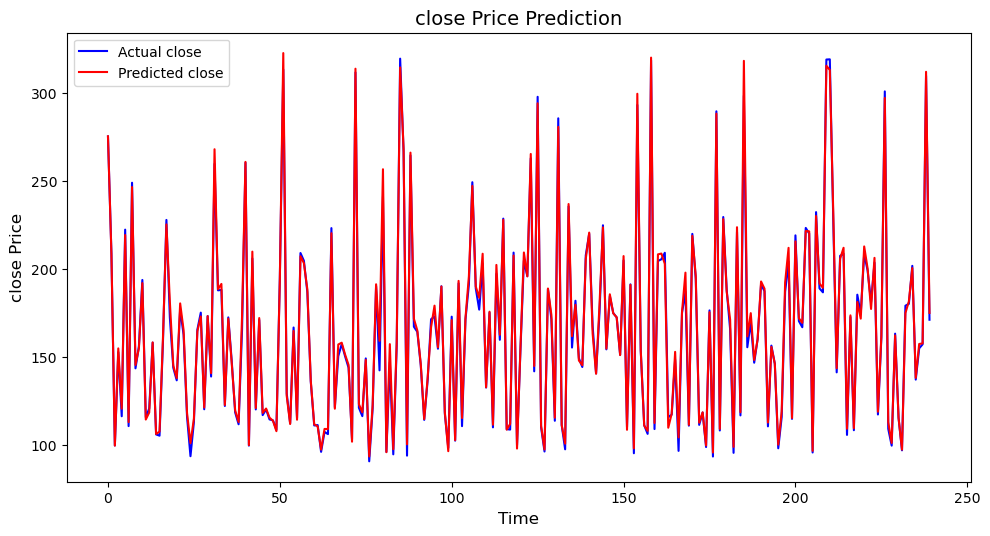

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 6))  # Reduced height from 15 to 8
n_cols = 2  # Still keeping 2 columns for good spacing
n_rows = int(np.ceil(len(apple_scaled_df.columns) / n_cols))

for i, col in enumerate(apple_scaled_df.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction', fontsize=14)
    plt.xlabel('Time', fontsize=12)
    plt.ylabel(f'{col} Price', fontsize=12)
    plt.legend(fontsize=10)

plt.tight_layout(pad=3.0)
plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict on training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# If necessary, reshape predictions to match true labels
y_train_pred = y_train_pred.reshape(-1)
y_test_pred = y_test_pred.reshape(-1)
y_train_true = y_train.reshape(-1)
y_test_true = y_test.reshape(-1)

# Training metrics
train_mae = mean_absolute_error(y_train_true, y_train_pred)
train_mse = mean_squared_error(y_train_true, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train_true, y_train_pred)

# Testing metrics
test_mae = mean_absolute_error(y_test_true, y_test_pred)
test_mse = mean_squared_error(y_test_true, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test_true, y_test_pred)

# Print results
print("Training Metrics:")
print(f"  MAE: {train_mae:.4f}")
print(f"  MSE: {train_mse:.4f}")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  R² Score: {train_r2:.4f}")

print("\nTesting Metrics:")
print(f"  MAE: {test_mae:.4f}")
print(f"  MSE: {test_mse:.4f}")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  R² Score: {test_r2:.4f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Training Metrics:
  MAE: 0.0115
  MSE: 0.0003
  RMSE: 0.0177
  R² Score: 0.9948

Testing Metrics:
  MAE: 0.0103
  MSE: 0.0002
  RMSE: 0.0152
  R² Score: 0.9957


In [30]:
import seaborn as sns

In [31]:
model.save("lstm_model.h5")
print("Model saved to lstm_model.h5")

Model saved to lstm_model.h5


In [32]:
from tensorflow.keras.models import load_model

loaded_model = load_model("lstm_model.h5")
print("Model loaded from lstm_model.h5")

Model loaded from lstm_model.h5


In [33]:
from sklearn.preprocessing import MinMaxScaler
import joblib

# Reshape 3D to 2D for scaler fitting
X_train_2d = X_train.reshape(-1, X_train.shape[-1])  # [samples * timesteps, features]

# Fit scaler
scaler = MinMaxScaler()
scaler.fit(X_train_2d)

# Save to .pkl file
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved to scaler.pkl")

Scaler saved to scaler.pkl


In [34]:
# Load the scaler
scaler = joblib.load('scaler.pkl')

# Example of transforming test data
X_test_2d = X_test.reshape(-1, X_test.shape[-1])
X_test_scaled = scaler.transform(X_test_2d)

# Reshape back to 3D if needed for LSTM
X_test_scaled = X_test_scaled.reshape(X_test.shape)


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import load_model
from datetime import datetime, timedelta

# Load original training data to fit scaler
df_train = pd.read_csv('AAPL.csv')  # Original dataset used for training
scaler = MinMaxScaler()
scaler.fit(df_train[['close']])  # Fit scaler on 'close' column

# Load prediction data
df_pred = pd.read_csv('aapl_with_target_258.csv')
df_pred['date'] = pd.to_datetime(df_pred['date'])  # Convert date column to datetime

# Prepare prices as a DataFrame to avoid feature name warning
prices_df = pd.DataFrame(df_pred['close'], columns=['close'])

# Parameters
n_steps = 60  # Sequence length for LSTM

# Set prediction date range explicitly: May 23, 2020 to May 23, 2022
start_date = pd.to_datetime('2020-05-23')
end_date = pd.to_datetime('2022-05-23')
n_forecast = (end_date - start_date).days + 1  # total days to predict

print(f"Forecasting for {n_forecast} days from {start_date.date()} to {end_date.date()}")

# Check if enough data for input sequence
if len(prices_df) < n_steps:
    raise ValueError(f"Need at least {n_steps} rows, but got {len(prices_df)}")

# Scale input prices (last n_steps from the dataset) as a DataFrame
scaled_input = scaler.transform(prices_df[['close']].iloc[-n_steps:])

# Reshape for LSTM [samples, timesteps, features]
input_seq = scaled_input.reshape(1, n_steps, 1)

# Load the trained LSTM model
model = load_model('lstm_model.h5')  # Note: Ignore warning about compiled metrics for prediction-only tasks

# Generate predictions
predictions_scaled = []
current_seq = input_seq.copy()

for _ in range(n_forecast):
    pred = model.predict(current_seq, verbose=0)[0, 0]
    predictions_scaled.append(pred)
    current_seq = np.append(current_seq[:, 1:, :], [[[pred]]], axis=1)

# Inverse transform predictions
predictions = scaler.inverse_transform(np.array(predictions_scaled).reshape(-1, 1)).flatten()

# Create date range for predictions
prediction_dates = [start_date + timedelta(days=i) for i in range(n_forecast)]

# Create DataFrame for predictions
pred_df = pd.DataFrame({
    'date': prediction_dates,
    'predicted_close': predictions
})

# Save predictions for the entire period to CSV
pred_df.to_csv('aapl_predictions_2020_05_23_to_2022_05_23.csv', index=False)
print("Predictions saved to 'aapl_predictions_2020_05_23_to_2022_05_23.csv'")

# Visualization: Plot predictions for ~1 month (May 23, 2020 to June 23, 2020)
plot_start = pd.to_datetime('2020-05-23')
plot_end = pd.to_datetime('2020-06-23')
plot_data = pred_df[(pred_df['date'] >= plot_start) & (pred_df['date'] <= plot_end)]

plt.figure(figsize=(10, 6))
plt.plot(plot_data['date'], plot_data['predicted_close'], label='Predicted Price', color='blue')
plt.title('AAPL Stock Price Prediction (May 23, 2020 to June 23, 2020)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('aapl_1month_prediction_2020.png')
plt.close()
print("1-month prediction plot saved to 'aapl_1month_prediction_2020.png'")

Forecasting for 731 days from 2020-05-23 to 2022-05-23
Predictions saved to 'aapl_predictions_2020_05_23_to_2022_05_23.csv'
1-month prediction plot saved to 'aapl_1month_prediction_2020.png'
